# NCG613 - Group 2 - Group Project 1
## An Exploratory Analysis of Crime in London, United Kingdom
##### Authors: Mark Walter Alfred, Saad Siddiqui, Ruineng Huang and Fernando Nicolas Szeliga Cabezuelo

### Introduction
#### Data Wrangling

In [193]:
import geopandas as geop
import pandas as pd
import numpy as np
import warnings
import seaborn
import matplotlib.pyplot as plt
import mapclassify

In [86]:
# Reading crimes csv file

crime_hist = pd.read_csv('MPS LSOA Level Crime (Historical).csv')

In [87]:
# New data set with 2011 colums and new variable with sum calculation by row. 

crime_2011 = crime_hist[crime_hist.columns[crime_hist.columns.str.startswith(('2011'))]]
crime_2011_totals = crime_2011.sum(axis=1)

In [88]:
# New data set with 2021 colums and new variable with sum calculation by LSOA (row). 

crime_2021 = crime_hist[crime_hist.columns[crime_hist.columns.str.startswith(('2021'))]]
crime_2021_totals = crime_2021.sum(axis=1)

In [89]:
# Copy of crime data and merging of 2011 and 2021 totals by row

crime_cases = crime_hist
crime_cases ['2011 Crime Cases'] = crime_2011_totals
crime_cases ['2021 Crime Cases'] = crime_2021_totals

In [90]:
# Selection of column

crime_cases = crime_cases[['LSOA Code', 'LSOA Name', '2011 Crime Cases', '2021 Crime Cases']]

In [91]:
# Group by and summary of the dataset, grouping by LSOA Code and Name and them summary of totals by LSOA for 2011 and 2021

crime = crime_cases.groupby(['LSOA Code','LSOA Name']).agg(
    LSOA_Crime2011 =('2011 Crime Cases', 'sum'),
    LSOA_Crime2021 =('2021 Crime Cases', 'sum')
)

In [92]:
# Read in population by place of birth data 2011 and selection of relevant columns

POB_2011 = pd.read_excel('Country of birth.xlsx', sheet_name= '2011')
POB_2011 = POB_2011 [['LSOA code', 'All Usual residents','United Kingdom']]
POB_2011['Non UK Percentage']= 1-(POB_2011['United Kingdom']/POB_2011['All Usual residents'])

POB_2011.drop(columns='United Kingdom', inplace=True)
#POB_2011 = POB_2011 [['LSOA code', 'All Usual residents', 'Non UK Percentage']]
POB_2011 = POB_2011.rename(columns={'LSOA code': 'LSOA Code'})

In [93]:
# Read in population by place of birth data 2021 and selection of relevant columns

POB_2021 = pd.read_excel('Country of birth.xlsx', sheet_name= '2021')
POB_2021 = POB_2021 [['LSOA code', 'All Usual residents','United Kingdom']]
POB_2021['Non UK Percentage']= 1-(POB_2021['United Kingdom']/POB_2021['All Usual residents'])
POB_2021.drop(columns='United Kingdom' ,inplace=True)

POB_2021 = POB_2021.rename(columns={'LSOA code': 'LSOA Code'})

In [94]:
# Find number of null values in POB 2011 and 2022 datasets

# Find mean, count and number of null values for each dataset

# To fix: printing out the fivenum values(i.e. min, 2nd, 3rd, 4th quartile and max)


yearnum = int()

for n in [POB_2011, POB_2021]:
    data_name = [name for name, obj in locals().items() if obj is n][0]
    n['Non UK Percentage'] = pd.Series(n['Non UK Percentage'])
    #Get summary statistics
    #%8.2f
    fivenum_summary = np.percentile(n['Non UK Percentage'].astype(float).dropna(), [0, 25, 50, 75, 100])
    print("{} statistics:".format(data_name) + " Min:{}".format(round(fivenum_summary[0],3)) + ", Q1:{} ".format(round(fivenum_summary[1],3)) + ", Median:{}".format(round(fivenum_summary[2],3))  + ", Q3:{}".format(round(fivenum_summary[3],3)) + ", Max:{}".format(round(fivenum_summary[4],3)))
    print("Mean Non UK population {} ".format(data_name) + " is "+  str(n['All Usual residents'].mean()))
    print("Mean Non UK population percentage for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].mean()))
    print("Variance Non UK population percentage for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].var()))
    print("Number of null population percentage values for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].isnull().sum()))
    print("Count of LSOAs with population percentage values  for {} ".format(data_name) + " is "+  str(n['Non UK Percentage'].count()))


POB_2011 statistics: Min:0.036, Q1:0.258 , Median:0.373, Q3:0.468, Max:0.823
Mean Non UK population POB_2011  is 1636.752302763316
Mean Non UK population percentage for POB_2011  is 0.3629362549727461
Variance Non UK population percentage for POB_2011  is 0.021107904939382204
Number of null population percentage values for POB_2011  is 37
Count of LSOAs with population percentage values  for POB_2011  is 4957
POB_2021 statistics: Min:0.045, Q1:0.309 , Median:0.408, Q3:0.495, Max:0.816
Mean Non UK population POB_2021  is 1762.0935122146575
Mean Non UK population percentage for POB_2021  is 0.40152347080770884
Variance Non UK population percentage for POB_2021  is 0.017587094682892837
Number of null population percentage values for POB_2021  is 0
Count of LSOAs with population percentage values  for POB_2021  is 4994


In [95]:
# Outer join with 2011 population

crime = crime.merge(POB_2011, on='LSOA Code', how='outer')

In [96]:
# Change of column name

crime = crime.rename(columns={'All Usual residents': '2011 Population'})

In [97]:
# Outer join with 2021 population

crime = crime.merge(POB_2021, on='LSOA Code', how='outer')

In [98]:
# Change of column name

crime = crime.rename(columns={'All Usual residents': '2021 Population'})
crime=crime.rename(columns={'Non UK Percentage_x': '2011 Non UK Percentage'})
crime=crime.rename(columns={'Non UK Percentage_y': '2021 Non UK Percentage'})

In [99]:
# Checking if there are any missing values. There are 6 rows missing crime data. THIS LINE OF CODE CAN STAY FOR OUR OWN INFORMATION BUT MAY BE REMOVED FOR THE FINAL REPORT.

crime.isnull().sum()

LSOA Code                  0
LSOA_Crime2011             6
LSOA_Crime2021             6
2011 Population            0
2011 Non UK Percentage    37
2021 Population            0
2021 Non UK Percentage     0
dtype: int64

In [100]:
# Crime copy for final dataset
crime_final = crime.copy()

In [101]:
# Calculation of 2011 crime rate by 1000 people

crime_final ['2011 Crime/1000 people'] = crime_final ['LSOA_Crime2011']/ (crime_final['2011 Population']/1000)

In [102]:
# Calculation of 2021 crime rate by 1000 people

crime_final ['2021 Crime/1000 people'] = crime_final ['LSOA_Crime2021']/ (crime_final['2021 Population']/1000)

In [103]:
# Reading crime csv file

#crime_hist = pd.read_excel('occupation.xlsx')
# Read multiple sheets
sheet_names = ['2011', '2021', 'change 2011-2021']  # List of sheet names
df_dict = pd.read_excel('occupation.xlsx', sheet_name=sheet_names)

# Access each DataFrame by sheet name
df_2011 = df_dict['2011']
df_2021 = df_dict['2021']
df_change = df_dict['change 2011-2021']


In [104]:
# Column rename for 2011

df_2011.rename(columns={'All usual residents aged 16-74 in employment':'Total Workforce'}, inplace=True)

In [105]:
# Column rename for 2021

df_2021.rename(columns={'All usual residents aged 16 and over in employment':'Total Workforce'}, inplace=True)

In [106]:
# Categorising data in groups

column_categories = {
    'White Collar': ['1. Managers, directors and senior officials', '2. Professional occupations', '3. Associate professional and technical occupations'],
    'Blue Collar': ['4. Adminis-trative and secretarial occupations', '5. Skilled trades occupations', '8. Process, plant and machine operatives'],
    'Elementary': ['6. Caring, leisure and other service occupations', '7. Sales and customer service occupations', '9. Elementary occupations']
}


In [107]:
# 2011 data aggreated in 3 groups, update the proportion of each group

df_2011['White Collar Sum'] = df_2011[column_categories['White Collar']].sum(axis=1)
df_2011['White Collar Prop'] = df_2011['White Collar Sum'] / df_2011['Total Workforce']

df_2011['Blue Collar Sum'] = df_2011[column_categories['Blue Collar']].sum(axis=1)
df_2011['Blue Collar Prop'] = df_2011['Blue Collar Sum'] / df_2011['Total Workforce']

df_2011['Elementary Sum'] = df_2011[column_categories['Elementary']].sum(axis=1)
df_2011['Elementary Prop'] = df_2011['Elementary Sum'] / df_2011['Total Workforce']

df_2011 = df_2011.iloc[:, np.r_[0:3, -6:0]]

In [108]:
# 2021 data aggreated in 3 groups, update the proportion of each group

df_2021['White Collar Sum'] = df_2021[column_categories['White Collar']].sum(axis=1)
df_2021['White Collar Prop'] = df_2021['White Collar Sum'] / df_2021['Total Workforce']

df_2021['Blue Collar Sum'] = df_2021[column_categories['Blue Collar']].sum(axis=1)
df_2021['Blue Collar Prop'] = df_2021['Blue Collar Sum'] / df_2021['Total Workforce']

df_2021['Elementary Sum'] = df_2021[column_categories['Elementary']].sum(axis=1)
df_2021['Elementary Prop'] = df_2021['Elementary Sum'] / df_2021['Total Workforce']

df_2021 = df_2021.iloc[:, np.r_[2, -6:0]]

In [109]:
# 2011 data left joined with 2021 by LSOA code

merged_df = pd.merge(df_2011, df_2021, on='LSOA code', suffixes = (' 2011', ' 2021'), how='left')
merged_df.rename(columns={'LSOA code': 'LSOA Code'}, inplace = True)
merged_df.drop(columns=['local authority code','local authority name'], inplace=True)

In [110]:
# Some simple statistics for each group

print("The mean for each group: ")
print(merged_df.iloc[:,3:].mean())
print()
print("The standard deviation for each group: ")
print(merged_df.iloc[:,3:].std())
print()
print("The five numbers for each group: ")
print(merged_df.iloc[:,3:].quantile([0, 0.25, 0.5, 0.75, 1]))

The mean for each group: 
Blue Collar Sum 2011      197.894473
Blue Collar Prop 2011       0.253519
Elementary Sum 2011       199.692431
Elementary Prop 2011        0.258523
White Collar Sum 2021     485.943933
White Collar Prop 2021      0.550012
Blue Collar Sum 2021      183.773728
Blue Collar Prop 2021       0.213815
Elementary Sum 2021       203.400080
Elementary Prop 2021        0.236173
dtype: float64

The standard deviation for each group: 
Blue Collar Sum 2011       68.159236
Blue Collar Prop 2011       0.080192
Elementary Sum 2011        81.144250
Elementary Prop 2011        0.102680
White Collar Sum 2021     194.709248
White Collar Prop 2021      0.159419
Blue Collar Sum 2021       68.026368
Blue Collar Prop 2021       0.074444
Elementary Sum 2021        90.024265
Elementary Prop 2021        0.098754
dtype: float64

The five numbers for each group: 
      Blue Collar Sum 2011  Blue Collar Prop 2011  Elementary Sum 2011  \
0.00                   0.0               0.054945     

In [111]:
crime_final = crime_final.merge(merged_df, on = 'LSOA Code', how='outer')

In [ ]:
# Read the crime data of 2021 for City of London
crime_col2021 = pd.read_csv('2021-city-of-london-street.csv')
crime_col2021.head()

In [ ]:
# Select rows of LSOA codes that have NaN values in the Final crime data

na_lsoa = ['E01000001', 'E01000002', 'E01000003', 'E01000005', 'E01032739', 'E01032740']
crime_col2021_filtered = crime_col2021[crime_col2021['LSOA code'].isin(na_lsoa) == True]
crime_col2021_filtered = crime_col2021_filtered.groupby('LSOA code').size().reset_index(name = 'LSOA_Crime2021')
crime_col2021_filtered.rename(columns={'LSOA code': 'LSOA Code'}, inplace=True)
crime_col2021_filtered

In [ ]:
# Now we calculate the crime rate for LSOAs beside the City of London, and one for the City of London alone
crime_met = crime_final[crime_final['LSOA Code'].isin(na_lsoa) == False]
crime_col = crime_final[crime_final['LSOA Code'].isin(na_lsoa) == True]

crime_col['LSOA_Crime2021'] = crime_col2021_filtered['LSOA_Crime2021'].values
crime_col['2021 Crime/1000 people'] = crime_col['LSOA_Crime2021'] / (crime_col['2021 Population']/1000)

crime_2021_met_sum = crime_met['LSOA_Crime2021'].sum()
crime_2021_col_sum = crime_col['LSOA_Crime2021'].sum()

crime_diff = (crime_2021_col_sum - crime_2021_met_sum) / crime_2021_met_sum

print('The total crime cases number in 2021 for the Metropolitan area is', crime_2021_met_sum)
print('The total crime cases number in 2021 for the City of London is', crime_2021_col_sum)
print('The difference in percentage between the two crime rates is', crime_diff*100, '%')

In [ ]:
# Now we calculate the crime rate of City of London in 2011: first calculate the sum by the same ratio to the Metropolitan area in 2021, and then calculate the crime case number of each LSOA by the weight matrix of 2021 crime case number


crime_2011_met_sum = crime_met['LSOA_Crime2011'].sum()
crime_2011_col_sum = round(crime_2011_met_sum * (1 + crime_diff))

crime_col['LSOA_Crime2011'] = round(crime_2011_col_sum * crime_col['LSOA_Crime2021'] / crime_col['LSOA_Crime2021'].sum())
crime_col['2011 Crime/1000 people'] = crime_col['LSOA_Crime2011'] / (crime_col['2011 Population']/1000)
crime_col

In [ ]:
# Now we merge the new data of City of London into the final crime data

crime_final.update(crime_col)
crime_final[crime_final['LSOA Code'].isin(na_lsoa) == True]

In [112]:
# Final crime data

crime_final.head(5)

,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage,2011 Crime/1000 people,2021 Crime/1000 people,White Collar Sum 2011,...,Blue Collar Sum 2011,Blue Collar Prop 2011,Elementary Sum 2011,Elementary Prop 2011,White Collar Sum 2021,White Collar Prop 2021,Blue Collar Sum 2021,Blue Collar Prop 2021,Elementary Sum 2021,Elementary Prop 2021
0,E01000006,98.0,94.0,1703,0.513212,1842,0.517915,57.545508,51.031488,277,...,257,0.329065,247,0.316261,299,0.337472,276,0.311512,311,0.351016
1,E01000007,355.0,507.0,1391,0.545651,2907,0.579635,255.212078,174.406605,218,...,172,0.283361,217,0.357496,579,0.420174,306,0.222061,493,0.357765
2,E01000008,161.0,224.0,1544,0.522021,1795,0.486908,104.274611,124.791086,132,...,144,0.264220,269,0.493578,169,0.262422,178,0.276398,297,0.461180
3,E01000009,308.0,298.0,1773,0.586012,1806,0.601883,173.716864,165.005537,296,...,205,0.266580,268,0.348505,243,0.310345,249,0.318008,291,0.371648
4,E01000011,107.0,111.0,1634,0.569767,1698,0.608952,65.483476,65.371025,239,...,180,0.260492,272,0.393632,211,0.286685,260,0.353261,265,0.360054


In [113]:
#List of missing values. THIS MAY BE REMOVED IN THE FINAL REPORT.

crime_final[crime_final.isnull().any(axis=1)]


,LSOA Code,LSOA_Crime2011,LSOA_Crime2021,2011 Population,2011 Non UK Percentage,2021 Population,2021 Non UK Percentage,2011 Crime/1000 people,2021 Crime/1000 people,White Collar Sum 2011,...,Blue Collar Sum 2011,Blue Collar Prop 2011,Elementary Sum 2011,Elementary Prop 2011,White Collar Sum 2021,White Collar Prop 2021,Blue Collar Sum 2021,Blue Collar Prop 2021,Elementary Sum 2021,Elementary Prop 2021
4666,E01033866,154.0,176.0,0,NaN,1118,0.650268,inf,157.423971,0,...,0,NaN,0,NaN,593,0.807902,81,0.110354,60,0.081744
4674,E01033874,513.0,199.0,0,NaN,1153,0.573287,inf,172.593235,0,...,0,NaN,0,NaN,584,0.846377,64,0.092754,42,0.060870
4690,E01033915,2.0,95.0,0,NaN,1487,0.516476,inf,63.887021,0,...,0,NaN,0,NaN,302,0.548094,113,0.205082,136,0.246824
4696,E01033921,5.0,80.0,0,NaN,1657,0.595051,inf,48.280024,0,...,0,NaN,0,NaN,557,0.606754,168,0.183007,193,0.210240
4715,E01033940,150.0,277.0,0,NaN,2352,0.560374,inf,117.772109,0,...,0,NaN,0,NaN,773,0.714418,128,0.118299,181,0.167283
4717,E01033942,286.0,415.0,0,NaN,1603,0.585777,inf,258.889582,0,...,0,NaN,0,NaN,662,0.746336,94,0.105975,131,0.147689
4727,E01034031,37.0,50.0,0,NaN,1309,0.751719,inf,38.197097,0,...,0,NaN,0,NaN,553,0.774510,83,0.116246,78,0.109244
4751,E01034147,5.0,9.0,0,NaN,1120,0.646429,inf,8.035714,0,...,0,NaN,0,NaN,598,0.705189,112,0.132075,138,0.162736
4752,E01034148,268.0,469.0,0,NaN,1626,0.576876,inf,288.437884,0,...,0,NaN,0,NaN,742,0.690233,142,0.132093,191,0.177674
4765,E01034177,18.0,67.0,0,NaN,1603,0.452901,inf,41.796631,0,...,0,NaN,0,NaN,521,0.622461,140,0.167264,176,0.210275


In [114]:
# Reading 2021 LSOA Boundaries

lsoa_2021 = geop.read_file('LSOA_Boundaries_2021.shp')


In [115]:
# Change of column name

lsoa_2021 = lsoa_2021.rename(columns={'LSOA21CD':'LSOA Code'})

In [116]:
# Selection of crime data for 2011 only

crime_2011 = crime_final.copy()
crime_2011 = crime_2011 [['LSOA Code', '2011 Crime/1000 people','2011 Population','2011 Non UK Percentage', 'White Collar Sum 2011','White Collar Prop 2011',	'Blue Collar Sum 2011',	'Blue Collar Prop 2011',	'Elementary Sum 2011',	'Elementary Prop 2011']]

In [117]:
# Merging the 2011 crime data with the 2011 LSOA Boundaries.
# Merging the geometry columns based on LSOA Code so that we have a 1-1 mapping between LSOA code, geometry and calculated columns.
# Need to reset the index for LSOA column for later re-use.

CrimeMap_2011 = lsoa_2021.merge(crime_2011)
CrimeMap_2011 = CrimeMap_2011.dissolve('LSOA Code')
CrimeMap_2011.reset_index(inplace=True)

In [118]:
# View of Merged Data

CrimeMap_2011.head(5)

,LSOA Code,geometry,OA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,2011 Crime/1000 people,2011 Population,2011 Non UK Percentage,White Collar Sum 2011,White Collar Prop 2011,Blue Collar Sum 2011,Blue Collar Prop 2011,Elementary Sum 2011,Elementary Prop 2011
0,E01000001,"POLYGON ((532275.938 181637.750, 532272.750 18...",E00000001,City of London 001A,None,532250,181864,51.5202,-0.095230,09af0f57-ef7c-448b-b0ba-093649a86e70,NaN,1465,0.326962,821,0.886609,70,0.075594,35,0.037797
1,E01000002,"POLYGON ((532624.323 181842.310, 532626.495 18...",E00000018,City of London 001B,None,532397,181793,51.5195,-0.093140,b9862ded-2d5e-4f2f-9009-951bb8f6ecae,NaN,1436,0.270195,795,0.873626,76,0.083516,39,0.042857
2,E01000003,"POLYGON ((532236.500 181891.563, 532224.624 18...",E00000010,City of London 001C,None,532092,182114,51.5225,-0.097410,eee105a5-6df7-41b7-ba8e-d77deb24493f,NaN,1346,0.324666,557,0.729058,97,0.126963,110,0.143979
3,E01000005,"POLYGON ((533615.622 181406.023, 533619.062 18...",E00000029,City of London 001E,None,533581,181249,51.5144,-0.076290,a5689649-6253-4357-b84c-9fe07fedf0c6,NaN,985,0.392893,220,0.462185,121,0.254202,135,0.283613
4,E01000006,"POLYGON ((545183.927 184145.062, 545179.170 18...",E00000049,Barking and Dagenham 016A,None,544816,184464,51.5405,0.086831,148eca51-307b-43e3-a746-8ded9845dabf,57.545508,1703,0.513212,277,0.354673,257,0.329065,247,0.316261


In [119]:
# There are only 6 LSOAs with missing crime rate and 37 with a missing immigration rate. THIS LINE OF CODE MAY BE REMOVED IN THE FINAL REPORT.

CrimeMap_2011.isnull().sum()

LSOA Code                    0
geometry                     0
OA21CD                       0
LSOA21NM                     0
LSOA21NMW                 4994
BNG_E                        0
BNG_N                        0
LAT                          0
LONG                         0
GlobalID                     0
2011 Crime/1000 people      10
2011 Population              0
2011 Non UK Percentage      37
White Collar Sum 2011        0
White Collar Prop 2011      37
Blue Collar Sum 2011         0
Blue Collar Prop 2011       37
Elementary Sum 2011          0
Elementary Prop 2011        37
dtype: int64

In [120]:
# These are the rows with the missing crime rate values

CrimeMap_2011[CrimeMap_2011.isnull().any(axis=1)]

,LSOA Code,geometry,OA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,2011 Crime/1000 people,2011 Population,2011 Non UK Percentage,White Collar Sum 2011,White Collar Prop 2011,Blue Collar Sum 2011,Blue Collar Prop 2011,Elementary Sum 2011,Elementary Prop 2011
0,E01000001,"POLYGON ((532275.938 181637.750, 532272.750 18...",E00000001,City of London 001A,None,532250,181864,51.5202,-0.095230,09af0f57-ef7c-448b-b0ba-093649a86e70,NaN,1465,0.326962,821,0.886609,70,0.075594,35,0.037797
1,E01000002,"POLYGON ((532624.323 181842.310, 532626.495 18...",E00000018,City of London 001B,None,532397,181793,51.5195,-0.093140,b9862ded-2d5e-4f2f-9009-951bb8f6ecae,NaN,1436,0.270195,795,0.873626,76,0.083516,39,0.042857
2,E01000003,"POLYGON ((532236.500 181891.563, 532224.624 18...",E00000010,City of London 001C,None,532092,182114,51.5225,-0.097410,eee105a5-6df7-41b7-ba8e-d77deb24493f,NaN,1346,0.324666,557,0.729058,97,0.126963,110,0.143979
3,E01000005,"POLYGON ((533615.622 181406.023, 533619.062 18...",E00000029,City of London 001E,None,533581,181249,51.5144,-0.076290,a5689649-6253-4357-b84c-9fe07fedf0c6,NaN,985,0.392893,220,0.462185,121,0.254202,135,0.283613
4,E01000006,"POLYGON ((545183.927 184145.062, 545179.170 18...",E00000049,Barking and Dagenham 016A,None,544816,184464,51.5405,0.086831,148eca51-307b-43e3-a746-8ded9845dabf,57.545508,1703,0.513212,277,0.354673,257,0.329065,247,0.316261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,E01035718,"POLYGON ((527200.571 179371.006, 527200.034 17...",E00023681,Westminster 019G,None,527479,179532,51.5004,-0.164800,8040735f-c089-480c-8206-7e2d3dbcf368,439.961575,3123,0.575088,924,0.785047,118,0.100255,135,0.114698
4990,E01035719,"POLYGON ((530027.347 178655.303, 530026.318 17...",E00024024,Westminster 021F,None,530131,178781,51.4930,-0.126890,18517a8e-60e9-4199-825d-22ba74251069,103.103103,999,0.417417,451,0.772260,66,0.113014,67,0.114726
4991,E01035720,"POLYGON ((529937.035 178468.282, 529937.633 17...",E00024029,Westminster 021G,None,530019,178421,51.4898,-0.128630,6d70fe2b-e242-4d23-a097-3eaf6c3fa096,69.955157,1115,0.409865,428,0.686998,123,0.197432,72,0.115570
4992,E01035721,"POLYGON ((528473.884 178196.720, 528463.322 17...",E00023532,Westminster 023H,None,528536,178558,51.4914,-0.149930,741b5bac-94c6-4dc6-ba81-1094c1c58e4d,287.187040,2716,0.442194,829,0.585039,255,0.179958,333,0.235004


In [121]:
# Selection of crime data for 2021 only

crime_2021 = crime_final.copy()
crime_2021 = crime_2021 [['LSOA Code', '2021 Crime/1000 people','2021 Population','2021 Non UK Percentage','White Collar Sum 2021','White Collar Prop 2021',	'Blue Collar Sum 2021',	'Blue Collar Prop 2021',	'Elementary Sum 2021',	'Elementary Prop 2021']]

In [122]:
# Merging the 2021 crime data with the 2021 LSOA Boundaries
# Merging the geometry columns based on LSOA Code so that we have a 1-1 mapping between LSOA code, geometry and calculated columns.
# Need to reset the index for LSOA column for later re-use.

CrimeMap_2021 = lsoa_2021.merge(crime_2021)
CrimeMap_2021 = CrimeMap_2021.dissolve('LSOA Code')
CrimeMap_2021.reset_index(inplace=True)

In [123]:
# View of Merged Data

CrimeMap_2021.head(5)

,LSOA Code,geometry,OA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,2021 Crime/1000 people,2021 Population,2021 Non UK Percentage,White Collar Sum 2021,White Collar Prop 2021,Blue Collar Sum 2021,Blue Collar Prop 2021,Elementary Sum 2021,Elementary Prop 2021
0,E01000001,"POLYGON ((532275.938 181637.750, 532272.750 18...",E00000001,City of London 001A,None,532250,181864,51.5202,-0.095230,09af0f57-ef7c-448b-b0ba-093649a86e70,NaN,1478,0.408660,784,0.903226,50,0.057604,34,0.039171
1,E01000002,"POLYGON ((532624.323 181842.310, 532626.495 18...",E00000018,City of London 001B,None,532397,181793,51.5195,-0.093140,b9862ded-2d5e-4f2f-9009-951bb8f6ecae,NaN,1382,0.450796,819,0.936000,41,0.046857,15,0.017143
2,E01000003,"POLYGON ((532236.500 181891.563, 532224.624 18...",E00000010,City of London 001C,None,532092,182114,51.5225,-0.097410,eee105a5-6df7-41b7-ba8e-d77deb24493f,NaN,1613,0.429014,796,0.794411,111,0.110778,95,0.094810
3,E01000005,"POLYGON ((533615.622 181406.023, 533619.062 18...",E00000029,City of London 001E,None,533581,181249,51.5144,-0.076290,a5689649-6253-4357-b84c-9fe07fedf0c6,NaN,1098,0.485428,242,0.489879,80,0.161943,172,0.348178
4,E01000006,"POLYGON ((545183.927 184145.062, 545179.170 18...",E00000049,Barking and Dagenham 016A,None,544816,184464,51.5405,0.086831,148eca51-307b-43e3-a746-8ded9845dabf,51.031488,1842,0.517915,299,0.337472,276,0.311512,311,0.351016


In [124]:
# There are only 6 LSOAs with missing crime rate. LSOA21NMW does not matter to us. THIS LINE OF CODE MAY BE DELETED FOR THE FINAL REPORT

CrimeMap_2021.isnull().sum()

LSOA Code                    0
geometry                     0
OA21CD                       0
LSOA21NM                     0
LSOA21NMW                 4994
BNG_E                        0
BNG_N                        0
LAT                          0
LONG                         0
GlobalID                     0
2021 Crime/1000 people       6
2021 Population              0
2021 Non UK Percentage       0
White Collar Sum 2021        0
White Collar Prop 2021       0
Blue Collar Sum 2021         0
Blue Collar Prop 2021        0
Elementary Sum 2021          0
Elementary Prop 2021         0
dtype: int64

#### Crime Data



In [41]:
# Concatenate the crime rates for 2011 and 2021 along rows
crime_rates_concatenate = pd.concat([CrimeMap_2011["2011 Crime/1000 people"], CrimeMap_2021["2021 Crime/1000 people"]])

# Create a DataFrame with the concatenated crime rates
crime_box_df = pd.DataFrame({'Crime Rate': crime_rates_concatenate})

# Create Series for years 2011 and 2021
array_2011 = np.full(len(CrimeMap_2011), 2011)
array_2021 = np.full(len(CrimeMap_2021), 2021)
series_2011 = pd.Series(array_2011)
series_2021 = pd.Series(array_2021)

# Concatenate the Series for years
years_column = pd.concat([series_2011, series_2021])

# Add the years column to the DataFrame
crime_box_df['Year'] = years_column


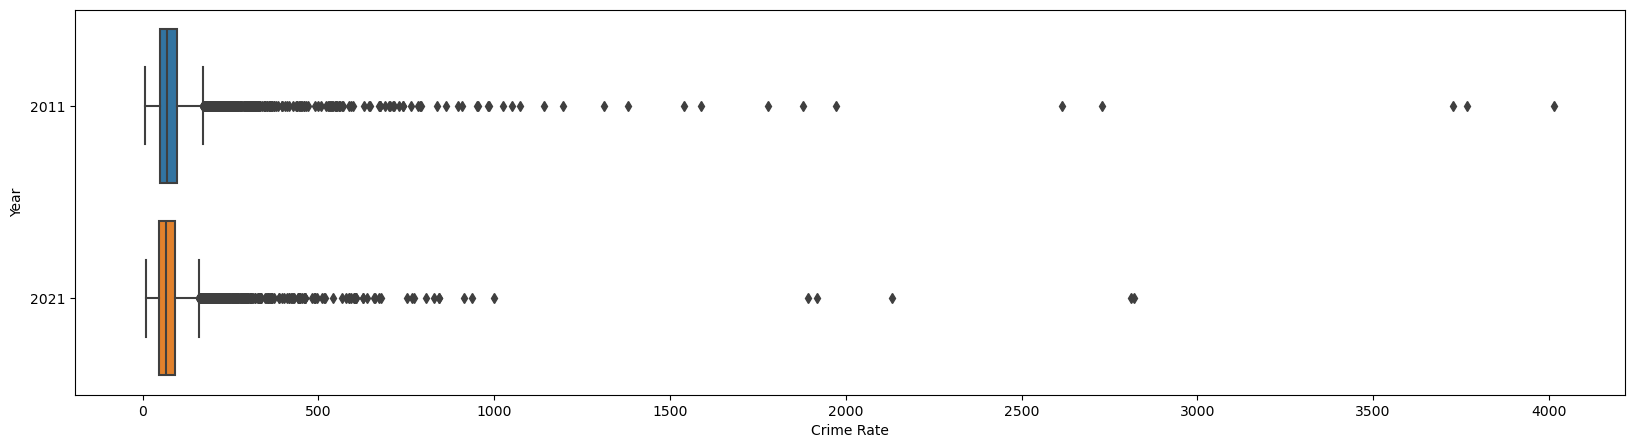

In [67]:
# Plot Code

plt.figure(figsize=(20,5))
crime_boxplot = seaborn.boxplot(data=crime_box_df, x="Crime Rate", y="Year", orient="h")

In [190]:
# Boxplot Statistics for 2011

# Selection of Relevant Columns

crime_2011_stats = crime_final[['LSOA Code', '2011 Crime/1000 people']]

# Drop of NaN and inf values

crime_2011_stats = crime_2011_stats[np.isfinite(crime_2011_stats['2011 Crime/1000 people'])]

# Calculation of median, LQ and UQ

crime_2011_median = crime_2011_stats['2011 Crime/1000 people'].median()
crime_2011_LQ = np.percentile(crime_2011_stats['2011 Crime/1000 people'],25)
crime_2011_UQ = np.percentile(crime_2011_stats['2011 Crime/1000 people'],75)
crime_2011_LW = crime_2011_LQ - (1.5 * (crime_2011_UQ - crime_2011_LQ))
crime_2011_UW = crime_2011_UQ + (1.5 * (crime_2011_UQ - crime_2011_LQ))

print("2011 Crime Boxplot Statistics")
print("Lower Whisker:", round(crime_2011_LW,2), "(this can be interpreted as 0 because values can not be negative)")
print("Lower Quartile:", round(crime_2011_LQ,2))
print("Median:", round(crime_2011_median,2))
print("Upper Quartile:", round(crime_2011_UQ,2))
print("Upper Whisker:", round(crime_2011_UW,2))
print("Number of Outliers:", sum(crime_2011_stats['2011 Crime/1000 people'] > crime_2011_UW))


2011 Crime Boxplot Statistics
Lower Whisker: -23.78 (this can be interpreted as 0 because values can not be negative)
Lower Quartile: 48.91
Median: 68.85
Upper Quartile: 97.36
Upper Whisker: 170.05
Number of Outliers: 395


In [192]:
# Boxplot Statistics for 2021

# Selection of Relevant Columns

crime_2021_stats = crime_final[['LSOA Code', '2021 Crime/1000 people']]

# Drop of NaN and inf values

crime_2021_stats = crime_2021_stats[np.isfinite(crime_2021_stats['2021 Crime/1000 people'])]

# Calculation of median, LQ and UQ

crime_2021_LQ = np.percentile(crime_2021_stats['2021 Crime/1000 people'],25)
crime_2021_UQ = np.percentile(crime_2021_stats['2021 Crime/1000 people'],75)
crime_2021_median = crime_2021_stats['2021 Crime/1000 people'].median()
crime_2021_LW = crime_2021_LQ - (1.5 * (crime_2021_UQ - crime_2021_LQ))
crime_2021_UW = crime_2021_UQ + (1.5 * (crime_2021_UQ - crime_2011_LQ))

print("2021 Crime Boxplot Statistics")
print("Lower Whisker:", round(crime_2021_LW,2), "(this can be interpreted as 0 because values can not be negative)")
print("Lower Quartile:", round(crime_2021_LQ,2))
print("Median:", round(crime_2021_median,2))
print("Upper Quartile:", round(crime_2021_UQ,2))
print("Upper Whisker:", round(crime_2021_UW,2))
print("Number of Outliers:", sum(crime_2021_stats['2021 Crime/1000 people'] > crime_2021_UW))

2021 Crime Boxplot Statistics
Lower Whisker: -21.56 (this can be interpreted as 0 because values can not be negative)
Lower Quartile: 46.6
Median: 65.09
Upper Quartile: 92.03
Upper Whisker: 156.72
Number of Outliers: 368


In [199]:
# Replace of inf and NaN values in CrimeMap_2011. THIS COULD BE DONE EARLIER.

CrimeMap_2011=CrimeMap_2011.replace([np.inf, np.NAN],0)

In [214]:
# Classification using Fisher Jenks

crime2011_fisher = mapclassify.FisherJenks(CrimeMap_2011['2011 Crime/1000 people'], k=6)
crime2011_fisher

FisherJenks

     Interval        Count
--------------------------
[   0.00,   87.50] |  3424
(  87.50,  198.35] |  1285
( 198.35,  469.84] |   219
( 469.84, 1072.09] |    52
(1072.09, 1973.06] |     9
(1973.06, 4015.62] |     5

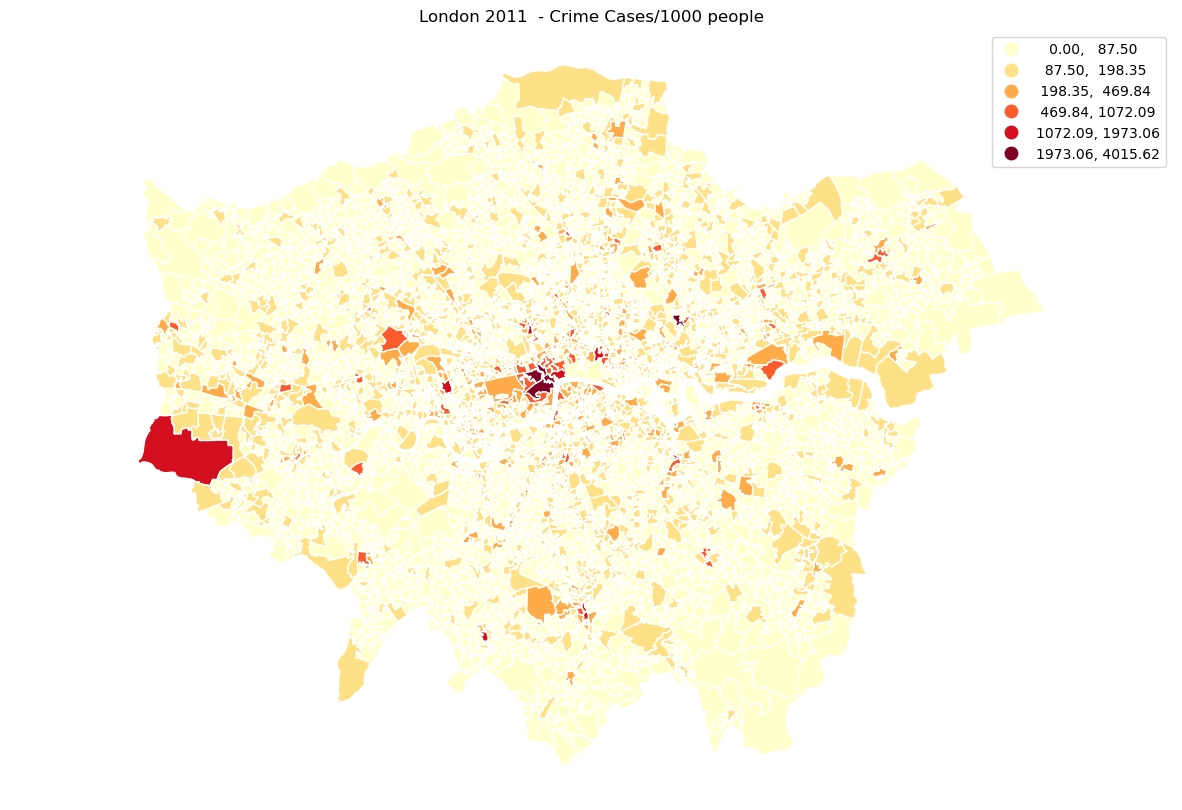

In [235]:
# Plot of 2011 Crime

f, ax = plt.subplots(1, figsize=(15, 10)) 
CrimeMap_2011.plot(ax=ax, column='2011 Crime/1000 people', legend=True, cmap='YlOrRd', scheme='FisherJenks', k=6, edgecolor='white')

ax.set_axis_off() 
ax.set_title('London 2011  - Crime Cases/1000 people') 
plt.axis('equal') 
plt.show()

In [236]:
# Replace of inf and NaN values in CrimeMap_2021. THIS COULD BE DONE EARLIER.

CrimeMap_2021=CrimeMap_2021.replace([np.inf, np.NAN],0)

In [237]:
# Classification using Fisher Jenks

crime2021_fisher = mapclassify.FisherJenks(CrimeMap_2021['2021 Crime/1000 people'], k=6)
crime2021_fisher

FisherJenks

     Interval        Count
--------------------------
[   0.00,   70.30] |  2818
(  70.30,  135.21] |  1670
( 135.21,  265.81] |   384
( 265.81,  517.34] |    89
( 517.34,  998.35] |    28
( 998.35, 2820.18] |     5

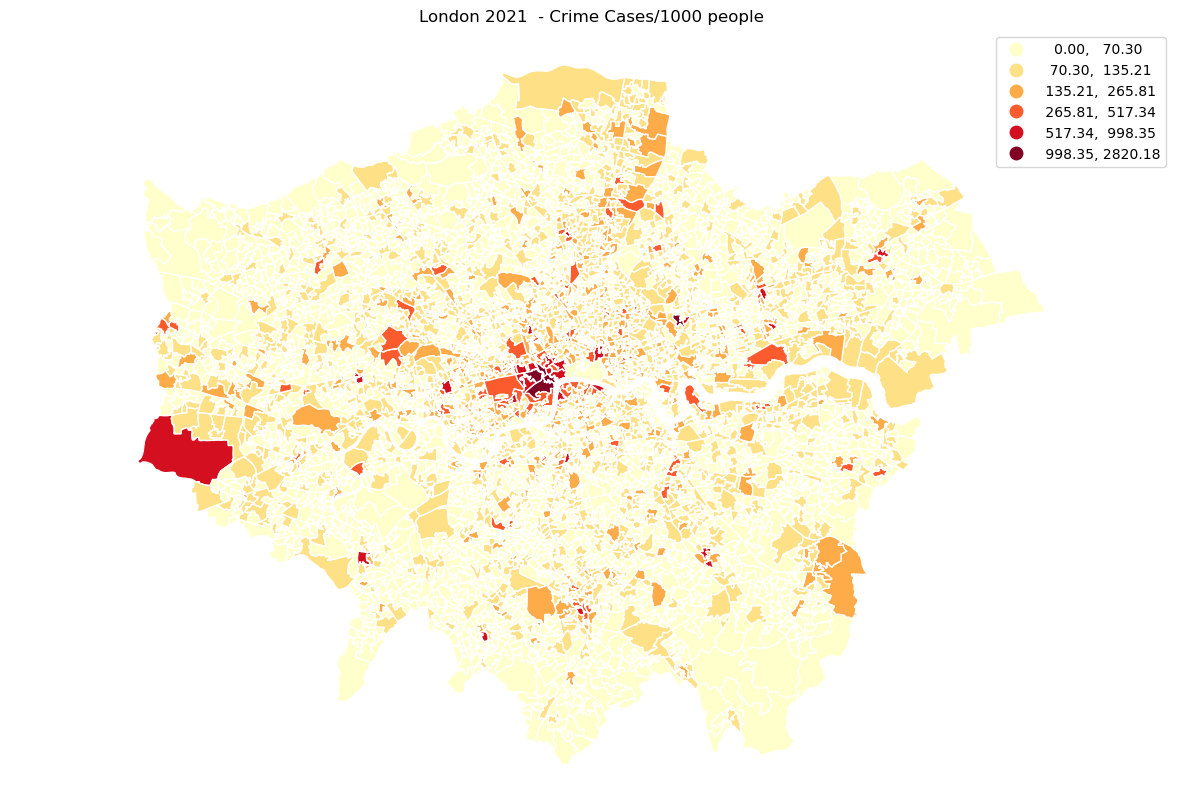

In [238]:
# Plot of 2021 Crime

f, ax = plt.subplots(1, figsize=(15, 10)) 
CrimeMap_2021.plot(ax=ax, column='2021 Crime/1000 people', legend=True, cmap='YlOrRd', scheme='FisherJenks', k=6, edgecolor='white')

ax.set_axis_off() 
ax.set_title('London 2021  - Crime Cases/1000 people') 
plt.axis('equal') 
plt.show()

#### Data Correlation

#### Relationship between Crime and Non-UK Population

Analysis:-
Analysing the crime rate & relationship with non-UK population the following steps were carried out:-
1. Set inf or NaNs to 0. These were a consequence of a handful (6) LSOAs having no crime rate available in the dataset we used. 
2. Starting with the crime rate & non-UK population rates, as calculated earlier in the code, the overall correlation between the 2 columns,  was found to be 0.197 and 0.243 for 2011 and 2021 respectively.
3. Ranked crime rates & non-UK population rates in descending order, for use in further analysis.
4. Sorted the crime rates in descending order (so LSOA with highest crime rates were first), we found for 2011
    (a)1 LSOA in East London (Newham) followed by Westminister (tourist and business area in Central London) had the highest crime rates.  Looking at crime rank versus non-UK population rank on their own, there's no apparent correlation for Westminister. An implication of this could be that there's other factors here, which would require further data to analyse e.g. being a tourist\business hotspot there's a greater footfall than other LSOAs or non residents could be higher crime targets.  In the case of Newham which has the 11th highest non-UK population rank (& Lewisham 19th) we found in 2011 the population was less than 1/10th that of the LSOA 2011 population mean (1637) which we did a deeper analysis based on doing a weighting for population but this didn't alter the findings. These 2 LSOAs appear to be outliers.
    (b) The LSOA's with the lowest crime rates were also in areas with the lower non-UK population rank. LSOAs in Bexley, Bromley and Kingston upon Thames were the LSOAs with the lowest crime rates for 2011. Once  LSOA population was factored in, a number of Havering and neighbouring LSOAs in Bexley now show as having the lowest crime rates. 

Repeating steps 4 (a) and (b) for 2021 the findings were as follows:-
(a) Westminster LSOAs now feature even more heavily in the top 10 LSOAs with the highest crime rates (up from 4/10 to 7/10), whether we take the pure crime rate or a weighted crime rate factoring in the LSOA population. Newham LSOAs continue to feature in the highest crime rate areas
(b) Areas with the lowest crime rates in 2021 continue to be LSOAs with a low non-UK population rate. This time Croydon has replaced Kingston upon Thames in the lowest crime areas. One interesting callout is in Croydon where there's an LSOA with a high non-UK percentage but a low crime rate which may indicate (deeper analysis required) that crime rates in surrounding LSOAs are a better indicator of crime.


In summary, for both 2011 and 2021 we can see clusters of LSOAs with both highest and lowest crime rates, with the finding that non-UK population isn't significant in areas with high crime rates but is in ares of low crime rates. We also see that neighbouring LSOAs are in similar crime rate categories.

To do:- Draw plots for (a) total crime rates and (b) based on weighted population
Also, look at weighted population formula to get agreement i.e. CrimeMap_2011['2011 Weighted Pop Crime Rate'] = CrimeMap_2011['2011 Crime/1000 people'] * (CrimeMap_2011['2011 Non UK Percentage'] * CrimeMap_2011['2011 Population'])

In [137]:
pd.set_option('display.width', 600)
print("Number of LSOAs for analysis:" + str(len(CrimeMap_2011)))



CrimeMap_2011_corr = round(CrimeMap_2011['2011 Crime/1000 people'].corr(CrimeMap_2011['2011 Non UK Percentage']),3)

CrimeMap_2011['2011 Weighted Pop Crime Rate'] = CrimeMap_2011['2011 Crime/1000 people'] * (CrimeMap_2011['2011 Non UK Percentage'] * CrimeMap_2011['2011 Population'])

print("Correlation between crime rate and 2011 non-UK population is:{}".format(CrimeMap_2011_corr))


#Setting inf and null as 0. These were due to missing data
CrimeMap_2011_sorted_df = pd.DataFrame(CrimeMap_2011[['2011 Crime/1000 people','2011 Non UK Percentage', '2011 Weighted Pop Crime Rate','2011 Population', 'LSOA Code','LSOA21NM']])
CrimeMap_2011_sorted_df=CrimeMap_2011_sorted_df.replace([np.inf, np.NAN],0)

#sorting by 2011 Non UK Percentage is descending order in order to create a new column ('Non UK Population Rank') which ranks the LSOA by non-UK population percentage for later analysis
CrimeMap_2011_sorted_df = CrimeMap_2011_sorted_df.sort_values(by='2011 Non UK Percentage',ascending=False )
CrimeMap_2011_sorted_df['Non UK Population Rank'] = range(1,len(CrimeMap_2011_sorted_df)+1)


##excluding 0s as we marked inf\nulls as 0. 
CrimeMap_2011_sorted_df_filtered = CrimeMap_2011_sorted_df[CrimeMap_2011_sorted_df['2011 Crime/1000 people'] > 0]
CrimeMap_2011_sorted_df = CrimeMap_2011_sorted_df.sort_values(by='2011 Crime/1000 people',ascending=False )
CrimeMap_2011_sorted_df['Crime Rank'] = range(1,len(CrimeMap_2011_sorted_df)+1)
CrimeMap_2011_sorted_df_filtered = CrimeMap_2011_sorted_df[CrimeMap_2011_sorted_df['2011 Crime/1000 people'] > 0] 


CrimeMap_2011_sorted_df = CrimeMap_2011_sorted_df.sort_values(by='2011 Crime/1000 people',ascending=False )
CrimeMap_2011_sorted_df_filtered = CrimeMap_2011_sorted_df[CrimeMap_2011_sorted_df['2011 Crime/1000 people'] > 0]

print("LSOAs with highest crime rate in 2011:")
print(CrimeMap_2011_sorted_df_filtered.head(10))

print("LSOAs with lowest crime rate in 2011:")
print(CrimeMap_2011_sorted_df_filtered.tail(10))

CrimeMap_2011_sorted_df = CrimeMap_2011_sorted_df.sort_values(by='2011 Weighted Pop Crime Rate',ascending=False )
CrimeMap_2011_sorted_df_filtered = CrimeMap_2011_sorted_df[CrimeMap_2011_sorted_df['2011 Weighted Pop Crime Rate'] > 0]

print("LSOAs with highest crime rate in 2011 weighted by non UK Population:")
print(CrimeMap_2011_sorted_df_filtered.head(10))

print("LSOAs with lowest crime rate in 2011 weighted by non UK Population:")
print(CrimeMap_2011_sorted_df_filtered.tail(10))

Number of LSOAs for analysis:4994
Correlation between crime rate and 2011 non-UK population is:0.197
LSOAs with highest crime rate in 2011:
      2011 Crime/1000 people  2011 Non UK Percentage  2011 Weighted Pop Crime Rate  2011 Population  LSOA Code          LSOA21NM  Non UK Population Rank  Crime Rank
4813             4015.625000                0.718750                  3.694375e+05              128  E01034220       Newham 039D                      11           1
4480             3766.227181                0.557809                  4.142850e+06             1972  E01004734  Westminster 018A                     432           2
4987             3726.556017                0.535270                  4.807257e+06             2410  E01035716  Westminster 013G                     590           3
4504             2728.725905                0.581100                  3.372705e+06             2127  E01004763  Westminster 013B                     292           4
4482             2614.678899       

In [138]:
CrimeMap_2021_corr = round(CrimeMap_2021['2021 Crime/1000 people'].corr(CrimeMap_2021['2021 Non UK Percentage']),3)

CrimeMap_2021['2021 Weighted Pop Crime Rate'] = CrimeMap_2021['2021 Crime/1000 people'] * (CrimeMap_2021['2021 Non UK Percentage'] * CrimeMap_2021['2021 Population'])

print("Correlation between crime rate and 2021 non-UK population is:{}".format(CrimeMap_2021_corr))


#Setting inf and null as 0. These were due to missing data
CrimeMap_2021_sorted_df = pd.DataFrame(CrimeMap_2021[['2021 Crime/1000 people','2021 Non UK Percentage', '2021 Weighted Pop Crime Rate','2021 Population', 'LSOA Code','LSOA21NM']])
CrimeMap_2021_sorted_df=CrimeMap_2021_sorted_df.replace([np.inf, np.NAN],0)

#sorting by 2021 Non UK Percentage is descending order in order to create a new column ('Non UK Population Rank') which ranks the LSOA by non-UK population percentage for later analysis
CrimeMap_2021_sorted_df = CrimeMap_2021_sorted_df.sort_values(by='2021 Non UK Percentage',ascending=False )
CrimeMap_2021_sorted_df['Non UK Population Rank'] = range(1,len(CrimeMap_2021_sorted_df)+1)


##excluding 0s as we marked inf\nulls as 0. 
CrimeMap_2021_sorted_df_filtered = CrimeMap_2021_sorted_df[CrimeMap_2021_sorted_df['2021 Crime/1000 people'] > 0]
CrimeMap_2021_sorted_df = CrimeMap_2021_sorted_df.sort_values(by='2021 Crime/1000 people',ascending=False )
CrimeMap_2021_sorted_df['Crime Rank'] = range(1,len(CrimeMap_2021_sorted_df)+1)
CrimeMap_2021_sorted_df_filtered = CrimeMap_2021_sorted_df[CrimeMap_2021_sorted_df['2021 Crime/1000 people'] > 0] 


CrimeMap_2021_sorted_df = CrimeMap_2021_sorted_df.sort_values(by='2021 Crime/1000 people',ascending=False )
CrimeMap_2021_sorted_df_filtered = CrimeMap_2021_sorted_df[CrimeMap_2021_sorted_df['2021 Crime/1000 people'] > 0]

print("LSOAs with highest crime rate in 2021:")
print(CrimeMap_2021_sorted_df_filtered.head(10))

print("LSOAs with lowest crime rate in 2021:")
print(CrimeMap_2021_sorted_df_filtered.tail(10))

CrimeMap_2021_sorted_df = CrimeMap_2021_sorted_df.sort_values(by='2021 Weighted Pop Crime Rate',ascending=False )
CrimeMap_2021_sorted_df_filtered = CrimeMap_2021_sorted_df[CrimeMap_2021_sorted_df['2021 Weighted Pop Crime Rate'] > 0]

print("LSOAs with highest crime rate in 2021 weighted by non UK Population:")
print(CrimeMap_2021_sorted_df_filtered.head(10))

print("LSOAs with lowest crime rate in 2021 weighted by non UK Population:")
print(CrimeMap_2021_sorted_df_filtered.tail(10))

Correlation between crime rate and 2021 non-UK population is:0.243
LSOAs with highest crime rate in 2021:
      2021 Crime/1000 people  2021 Non UK Percentage  2021 Weighted Pop Crime Rate  2021 Population  LSOA Code          LSOA21NM  Non UK Population Rank  Crime Rank
4480             2820.178042                0.600593                  2.854020e+06             1685  E01004734  Westminster 018A                     318           1
4987             2810.282075                0.566424                  3.498801e+06             2198  E01035716  Westminster 013G                     530           2
4504             2131.683168                0.650990                  2.803163e+06             2020  E01004763  Westminster 013B                     122           3
4482             1919.563736                0.549421                  1.547168e+06             1467  E01004736  Westminster 018C                     667           4
4813             1893.376414                0.612278                 

#### Relationship Between Crime and Occupation



#### Conclusions